In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the csv file
df=pd.read_csv('fraud_loan.csv',sep=' *, *')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#found the null values reported in few attribures

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
#filling te attributes with the null values
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [11]:
#filling the Gender attribute with the most frequent values
freq=df.Credit_History.dropna().mode()[0]
df['Credit_History']=df['Credit_History'].fillna(freq)

In [12]:
freq_port = df.Gender.dropna().mode()[0]
df['Gender'] = df['Gender'].fillna(freq_port)

In [13]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
#filling the Self- Empoloyed attribute with the most frequent values
freq1=df.Self_Employed.dropna().mode()[0]
df['Self_Employed']=df['Self_Employed'].fillna(freq1)

In [15]:
freq2=df.Dependents.dropna().mode()[0]
df['Dependents']=df['Dependents'].fillna(freq2)

In [16]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [17]:
freq3=df.Loan_Amount_Term.dropna().mode()[0]
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(freq3)

In [18]:
freq4=df.Married.dropna().mode()[0]
df['Married']=df['Married'].fillna(freq4)

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

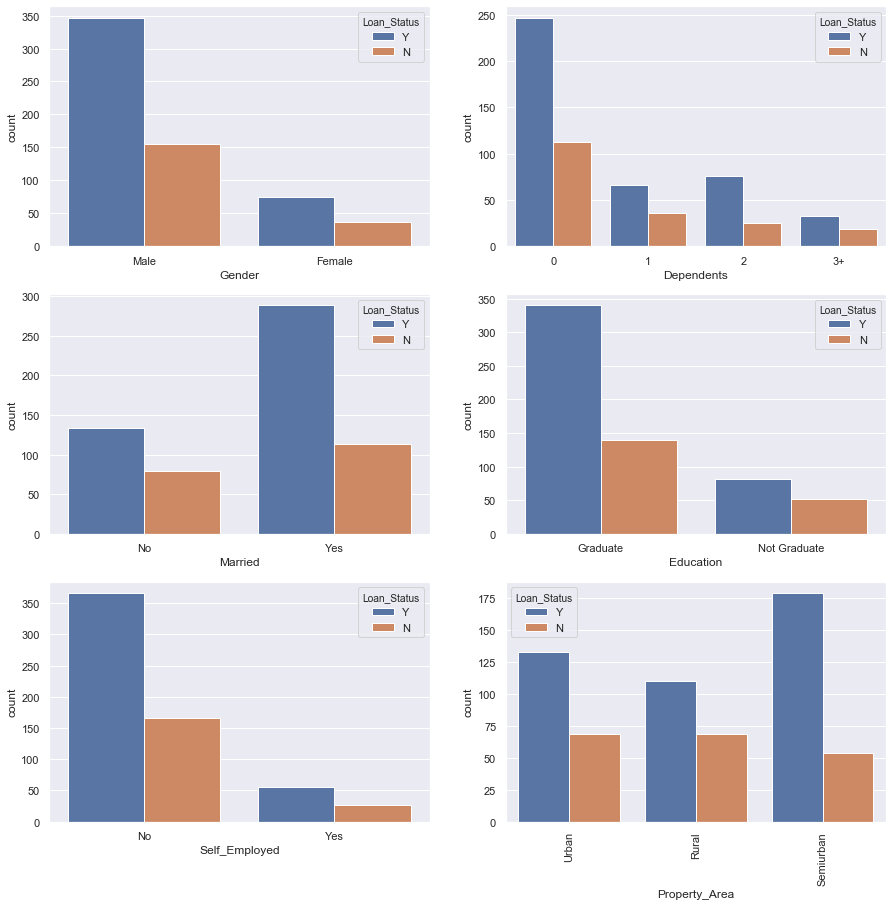

In [20]:
sns.set(font_scale=1.0)
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,15)
sns.countplot(x='Gender',hue='Loan_Status',data=df,ax=axes[0,0])
sns.countplot(x='Dependents',hue='Loan_Status',data=df,ax=axes[0,1])
sns.countplot(x='Married',hue='Loan_Status',data=df,ax=axes[1,0])
sns.countplot(x='Education',hue='Loan_Status',data=df,ax=axes[1,1])
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df,ax=axes[2,0])
sns.countplot(x='Property_Area',hue='Loan_Status',data=df,ax=axes[2,1])
plt.xticks(rotation=90)
plt.show()

In [21]:
#Loan Status sactioned for most of the Male  
#Loan Status sactioned for most of the Urban Areas than Rural Areas 


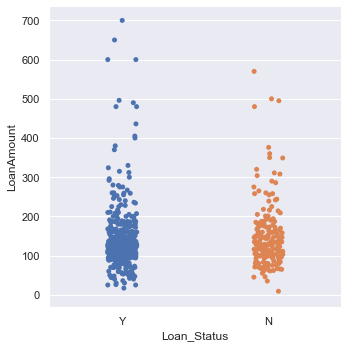

In [22]:
sns.set(font_scale=1.0)
sns.catplot(y='LoanAmount',x='Loan_Status',data=df,kind='strip')

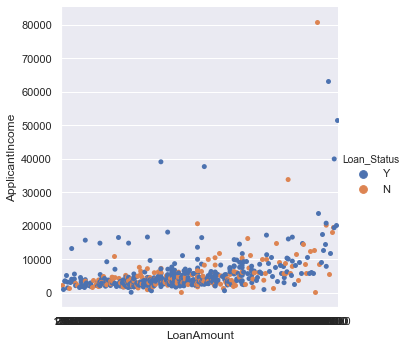

In [23]:
sns.set(font_scale=1.0)
sns.catplot(y='ApplicantIncome',x='LoanAmount',hue='Loan_Status',data=df,kind='strip')

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,6:11]))

In [25]:
#Removing the outliers
df=df[(z<3).all(axis=1)]
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
df.shape

(577, 13)

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [28]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
#classifying the categorica variable
df=pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area','Loan_Status'],drop_first=True)

In [30]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [31]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [32]:
df.shape

(577, 15)

In [33]:
df.rename(columns={'Loan_Status_Y':'Loan_status'},inplace=True)

In [34]:
y=df.iloc[:,14:15]
y.head()

,Loan_status
0,1
1,0
2,1
3,1
4,1


In [35]:
x=df.drop(['Loan_status'],axis=1)
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1


In [36]:
max_ascore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    a_scr=accuracy_score(y_test,pred)
    print("accuracy_score corresponding to random state:",r_state,"is:",a_scr)
    if a_scr>max_ascore:
        max_ascore=a_scr
        final_r_state=r_state
print()
print("max accuracy score corresponding to r_state is",final_r_state,"is:",max_ascore)

accuracy_score corresponding to random state: 42 is: 0.8275862068965517
accuracy_score corresponding to random state: 43 is: 0.7931034482758621
accuracy_score corresponding to random state: 44 is: 0.8103448275862069
accuracy_score corresponding to random state: 45 is: 0.8017241379310345
accuracy_score corresponding to random state: 46 is: 0.8189655172413793
accuracy_score corresponding to random state: 47 is: 0.7931034482758621
accuracy_score corresponding to random state: 48 is: 0.8103448275862069
accuracy_score corresponding to random state: 49 is: 0.7844827586206896
accuracy_score corresponding to random state: 50 is: 0.8103448275862069
accuracy_score corresponding to random state: 51 is: 0.7931034482758621
accuracy_score corresponding to random state: 52 is: 0.853448275862069
accuracy_score corresponding to random state: 53 is: 0.7844827586206896
accuracy_score corresponding to random state: 54 is: 0.7672413793103449
accuracy_score corresponding to random state: 55 is: 0.8362068965

In [37]:
#Using Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
sample_split_range = list(range(2, 80))
param_grid = dict(min_samples_split=sample_split_range)
grid_search=GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')

In [38]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 1

In [39]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=47,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
from sklearn.metrics import f1_score
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=47,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = dtc.predict(x)
    score = dtc.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8286334056399133
The F1 Score is: 0.8111246432628588
The score is: 0.8362068965517241
The F1 Score is: 0.822486596419631


In [41]:
#Using ensemble technique with Random Forest Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
model_new=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25],    
    'min_samples_leaf': [1, 2, 4, 10, 15 ],
    'min_samples_split': [2, 5, 10, 20],
    'n_estimators': [25, 50, 100, 200]}

grid_search = GridSearchCV(model_new, params, cv = 3)

In [42]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [43]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
model_new = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model_new.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model_new.predict(x)
    score = model_new.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)
        
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8221258134490239
The F1 Score is: 0.8000295377601673
The score is: 0.8362068965517241
The F1 Score is: 0.822486596419631


In [46]:
from sklearn.externals import joblib
joblib.dump(dtc,'fraud-loan_classification.pkl')

['fraud-loan_classification.pkl']